### Housing Price Prediction – King County, USA

#### Overview
This project aims to predict house prices in King County, Washington, using real estate attributes such as the number of bedrooms, square footage, location, and renovation status.  
We will explore the data, preprocess it, engineer new features, and build  models to achieve accurate predictions.

**Goals:**
- Understand the key factors influencing house prices.
- Build a predictive model that generalizes well.
- Interpret and communicate insights effectively.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('housing_price.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [33]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [35]:
df.duplicated().sum()

np.int64(0)

## Univariate Analysis

> Numerical Features → histograms / KDE plots.


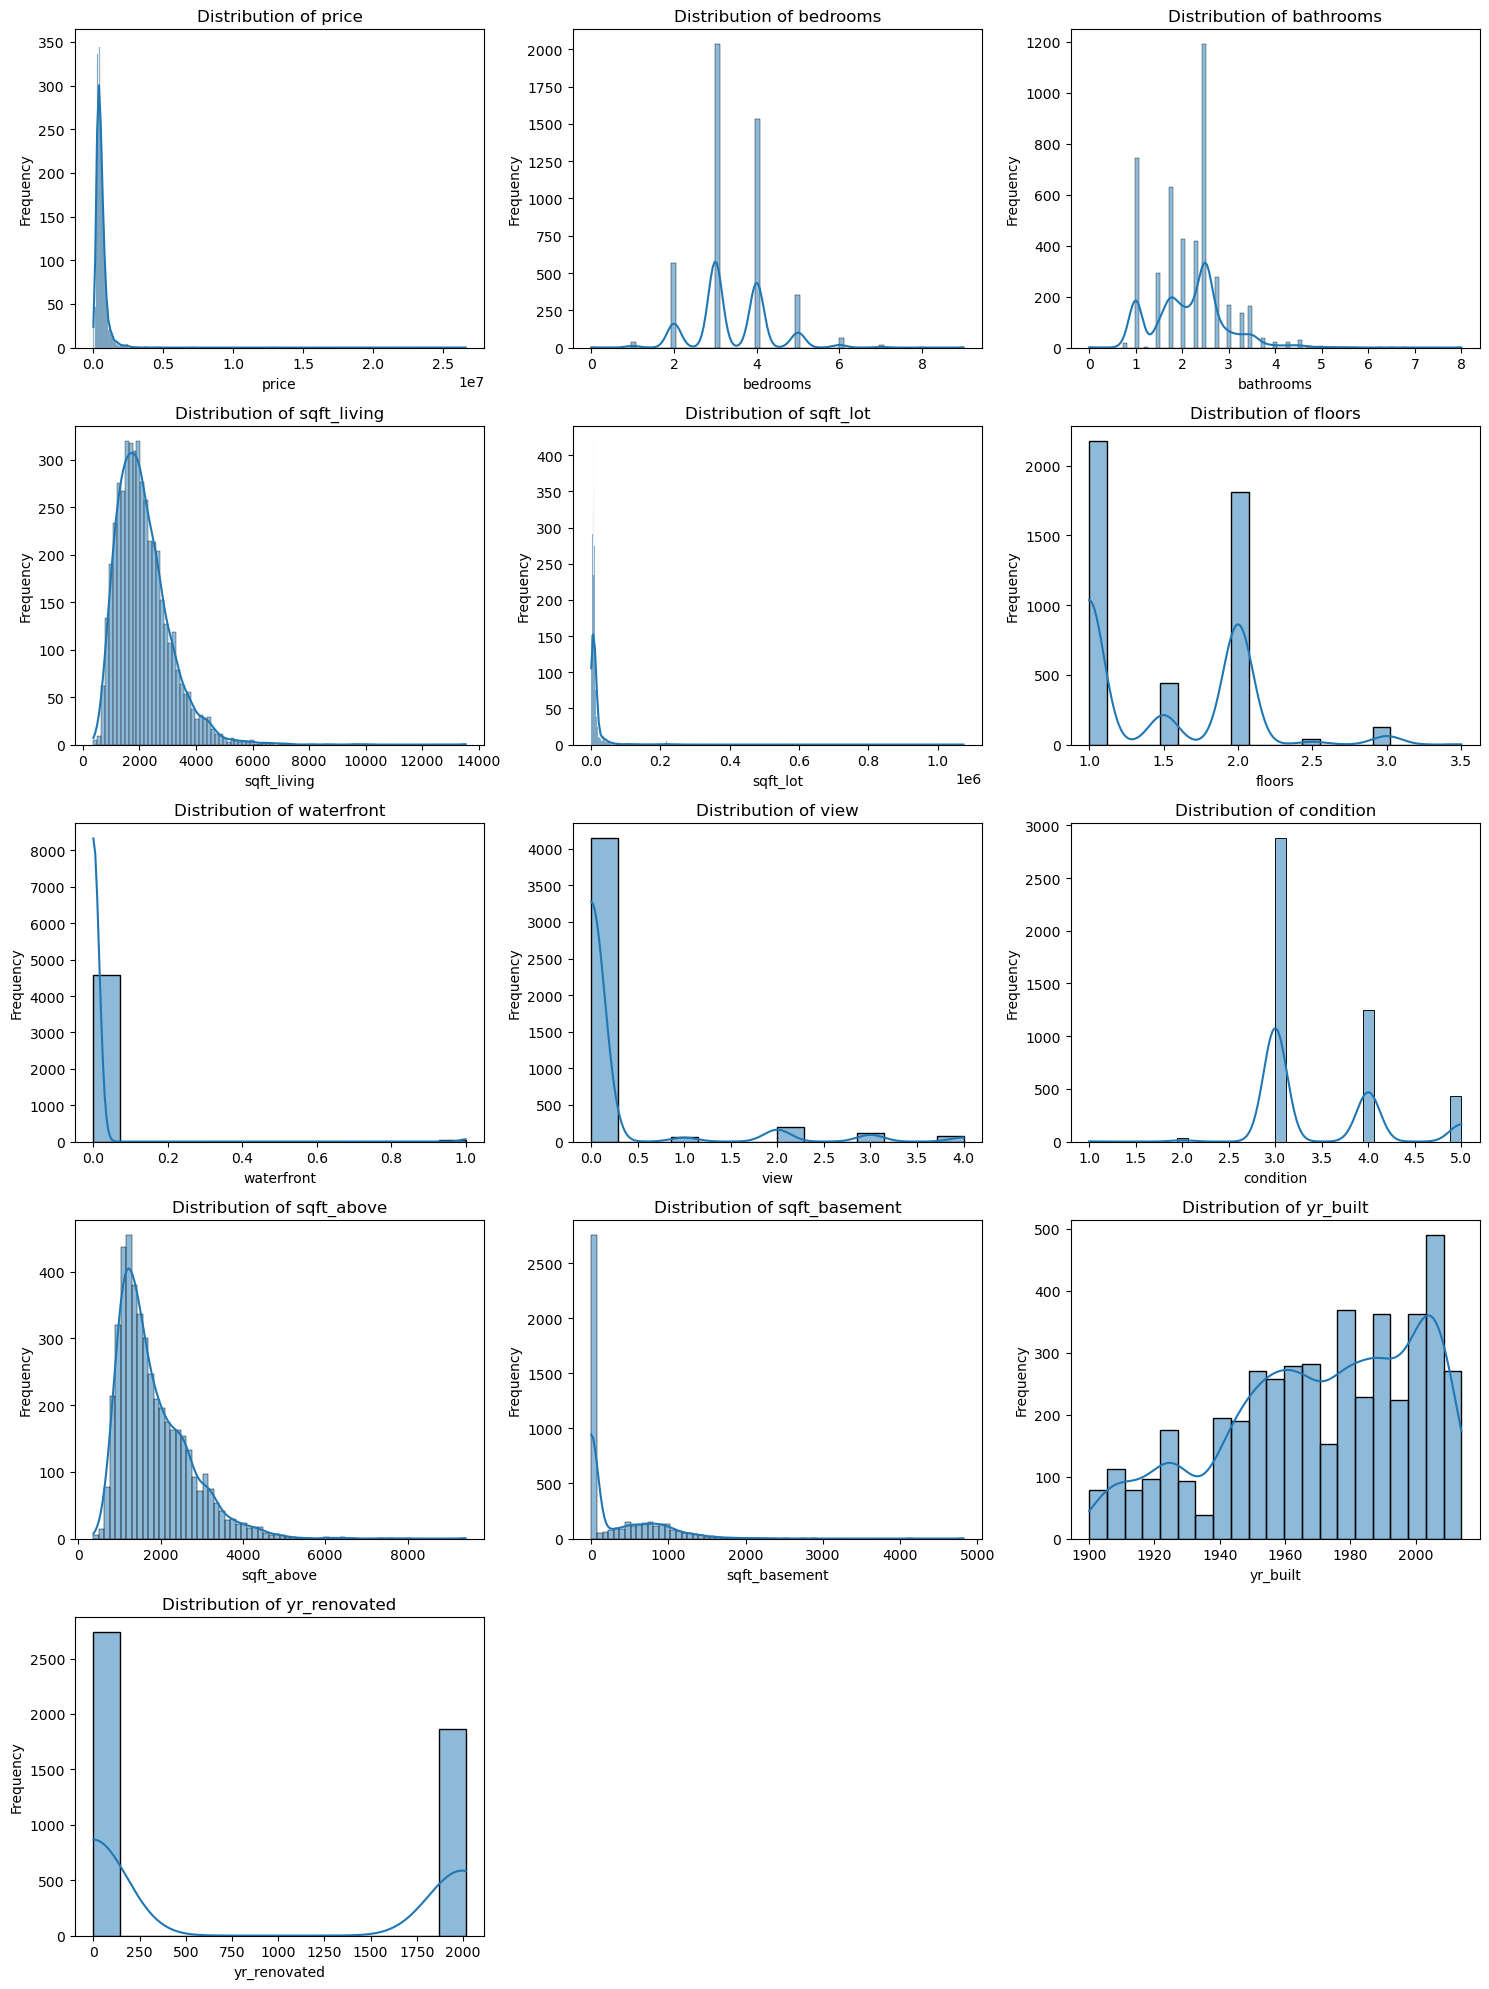

In [36]:
import math
df_num = df.select_dtypes(include=['int', 'float']).columns.tolist()


n_cols = 3

n_rows = math.ceil( len(df_num)/ n_cols )

fig,axes = plt.subplots(n_rows, n_cols , figsize = ( n_cols *5 , n_rows *4 ))
axes = axes.flatten()

for i, col in enumerate(df_num):
    sns.histplot(data = df, x=col, kde=True, ax = axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


>Categorical Features → countplots.

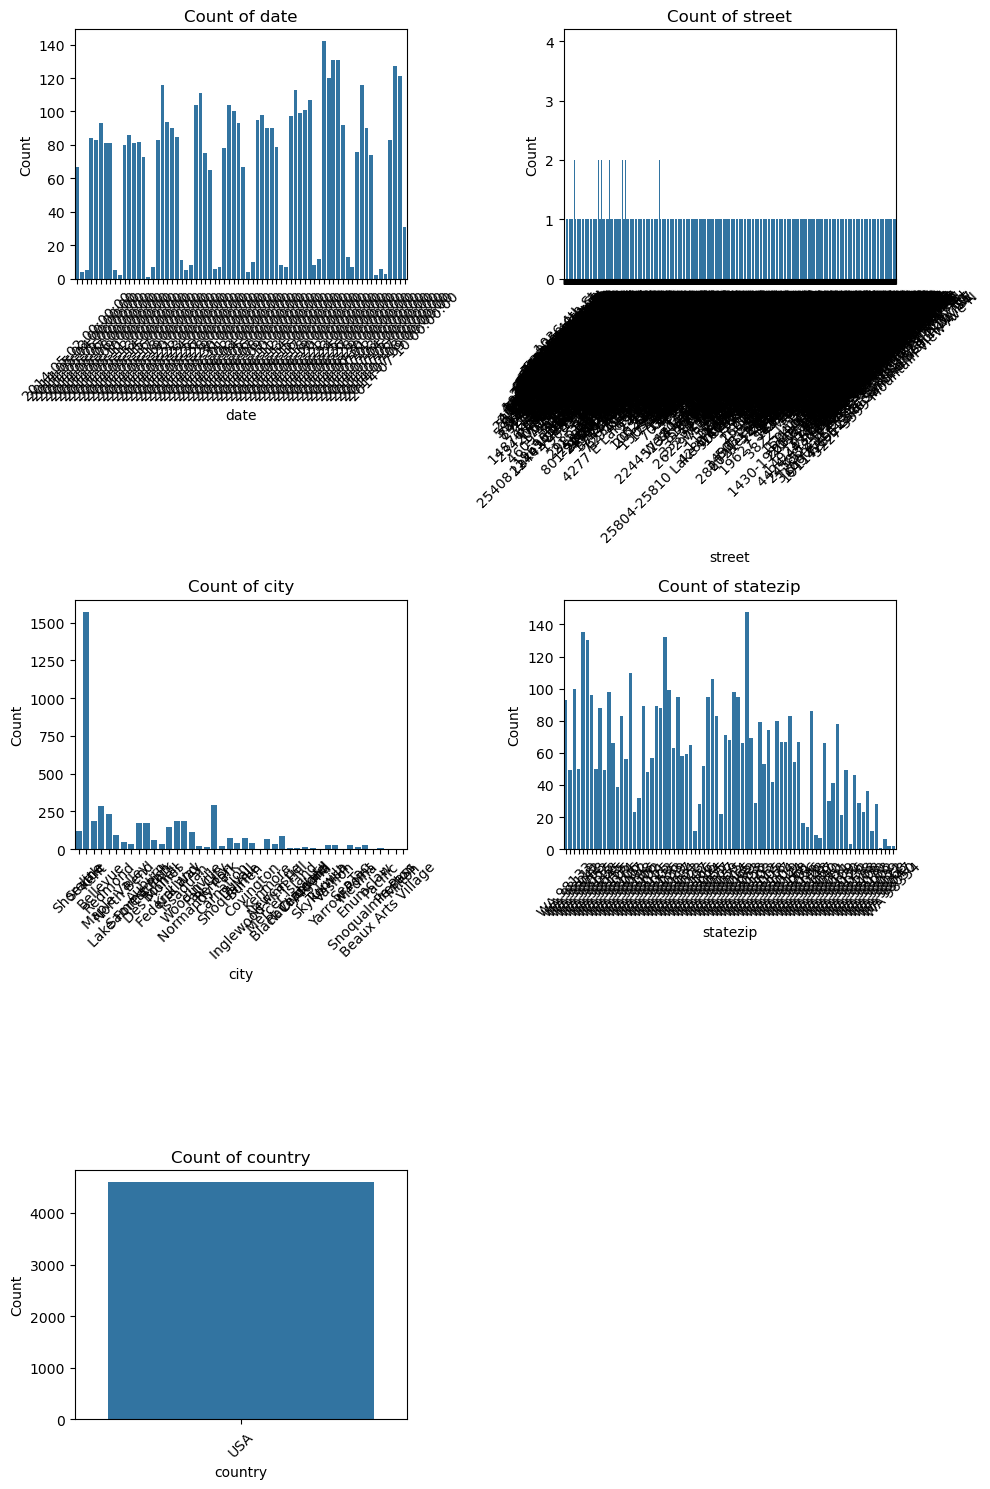

In [37]:
df_cat = df.select_dtypes(include = 'object' ).columns.tolist()

n_cols = 2
n_rows = math.ceil(len(df_cat)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols , figsize = (n_cols *5 , n_rows *5))
axes = axes.flatten()

for i ,col in enumerate(df_cat):
    sns.countplot(data = df, x = col, ax= axes[i])
    axes[i].set_title(f'Count of {col}')

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Bivariate Analysis




 - Price Vs Bedroom

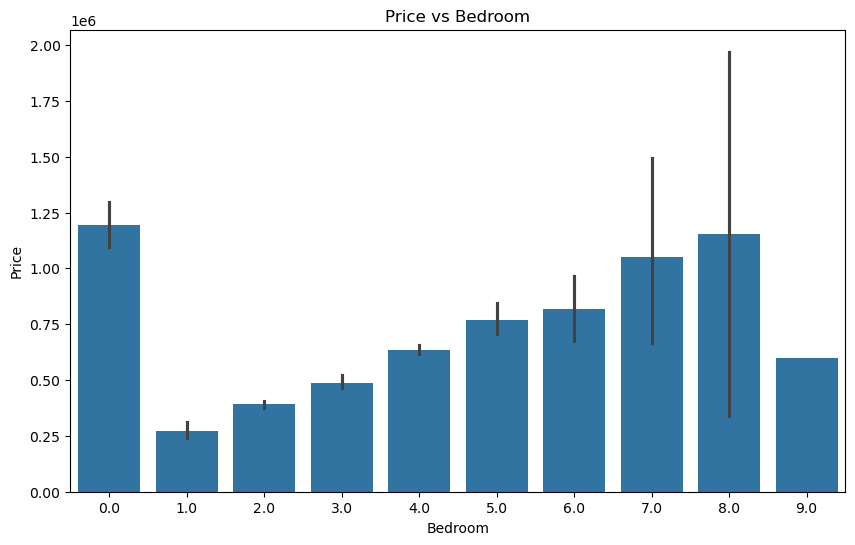

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x='bedrooms', y = 'price')
plt.title('Price vs Bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Price')

plt.show()

### Average Price by Bedroom Count
Highest average prices occur for:

`0 bedrooms` — possibly luxury studio apartments or high-value properties with open layouts.

`7–8 bedrooms` — large luxury homes.

Lowest average prices occur for:

`1 bedroom` — typical entry-level or small homes.

- General Trend
 Price tends to increase with bedroom count up to a certain point (8 bedrooms), but it’s not perfectly linear.

- Very high bedroom counts (8) have huge variability — the black confidence interval lines are very long, meaning some homes are extremely expensive and some are much cheaper.

- Variability & Confidence Intervals
    - Narrow CI (e.g., 1–5 bedrooms) = prices are more consistent in that category.

    - Wide CI (e.g., 7–8 bedrooms) = huge variation in prices, possibly due to differences in location, luxury features, and lot size.

- Potential Outliers
The large confidence interval for 8 bedrooms suggests some extreme price outliers pulling the mean upward.



---
- Prie Vs City


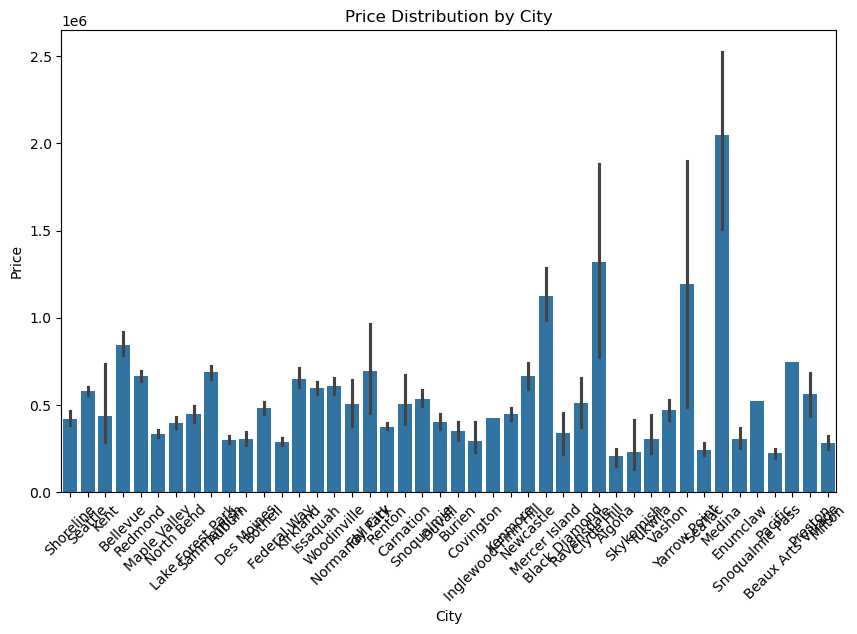

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='city', y='price')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.show()

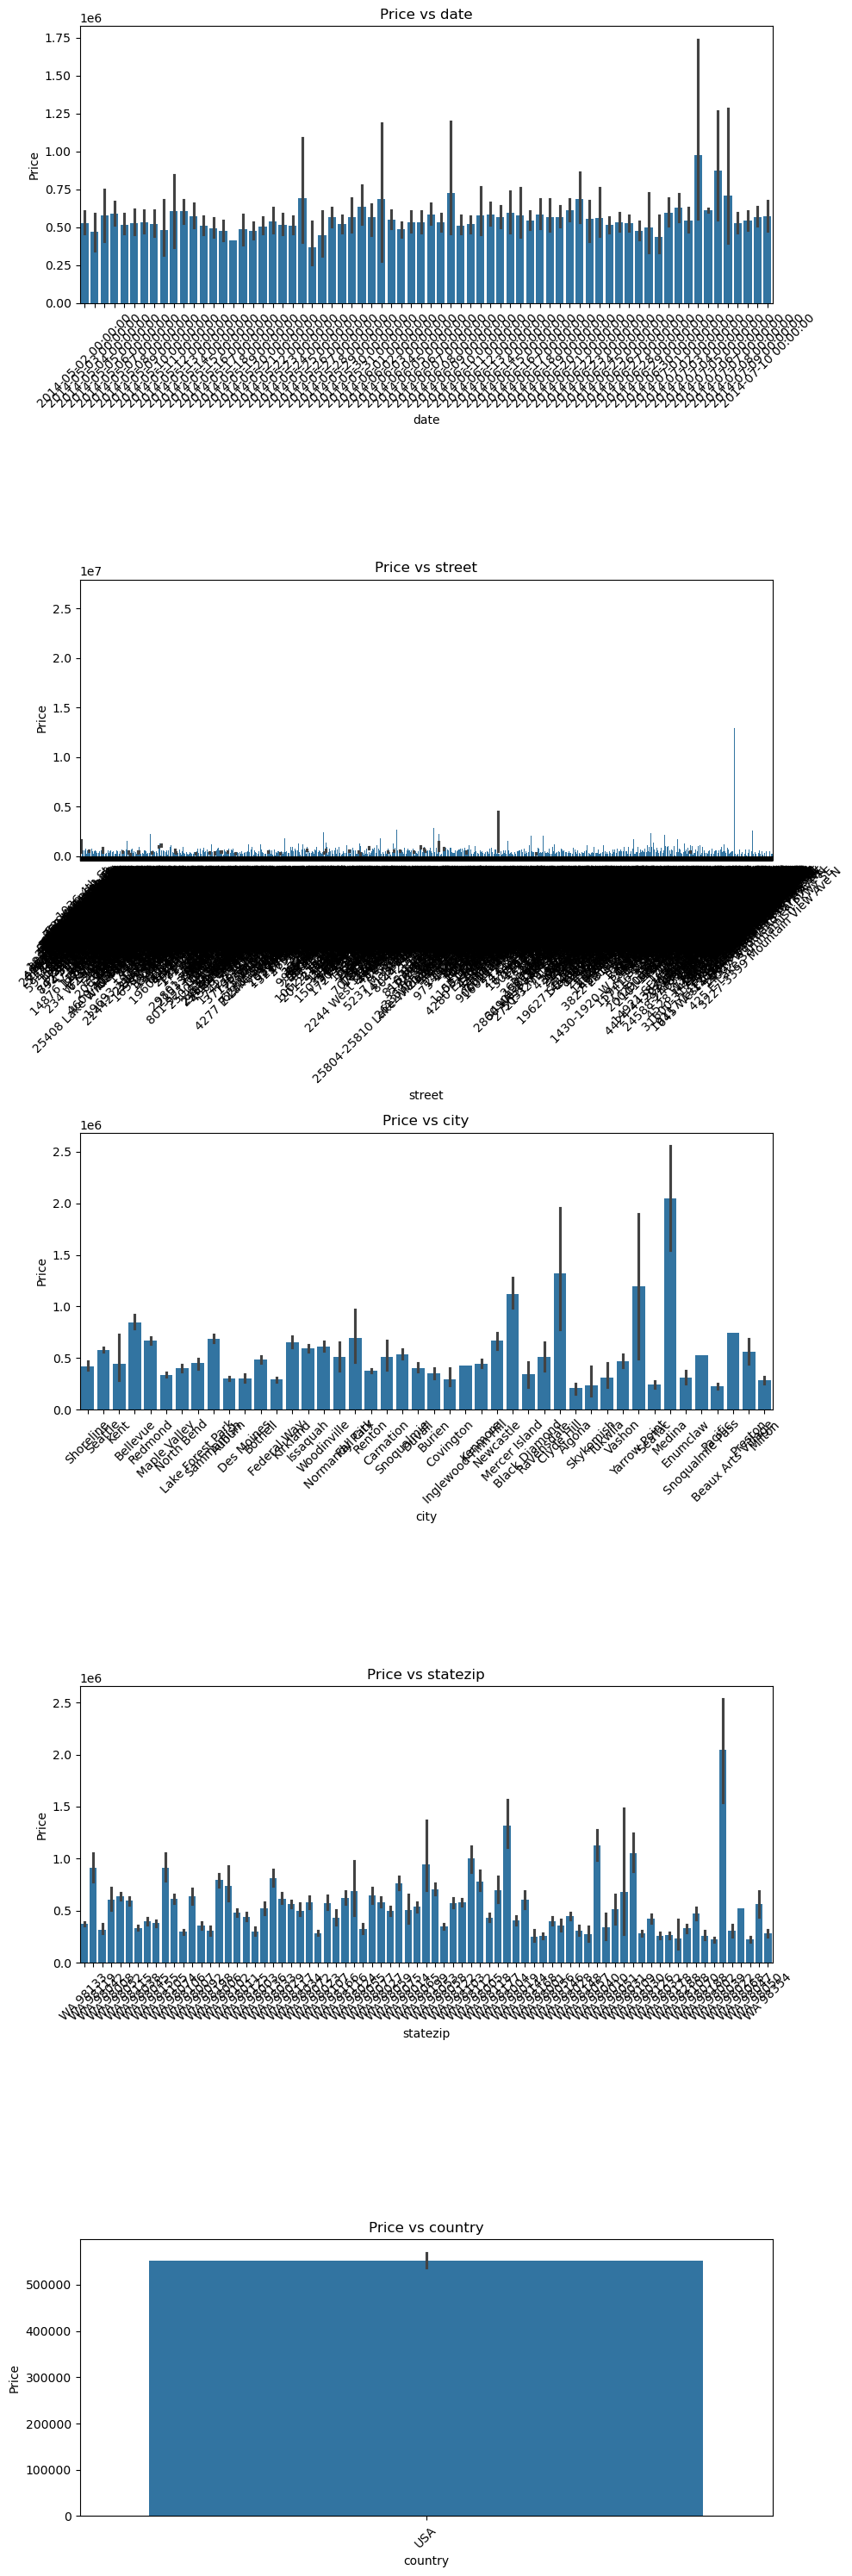

In [40]:
df_cat
n_cols = 1
n_rows = math.ceil(len(df_cat)/n_cols)

fig,axes = plt.subplots(n_rows, n_cols , figsize = (n_cols * 10 , n_rows *6))
axes = axes.flatten()

for i, col in enumerate(df_cat):
    sns.barplot(data = df, x= col, y= 'price', ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

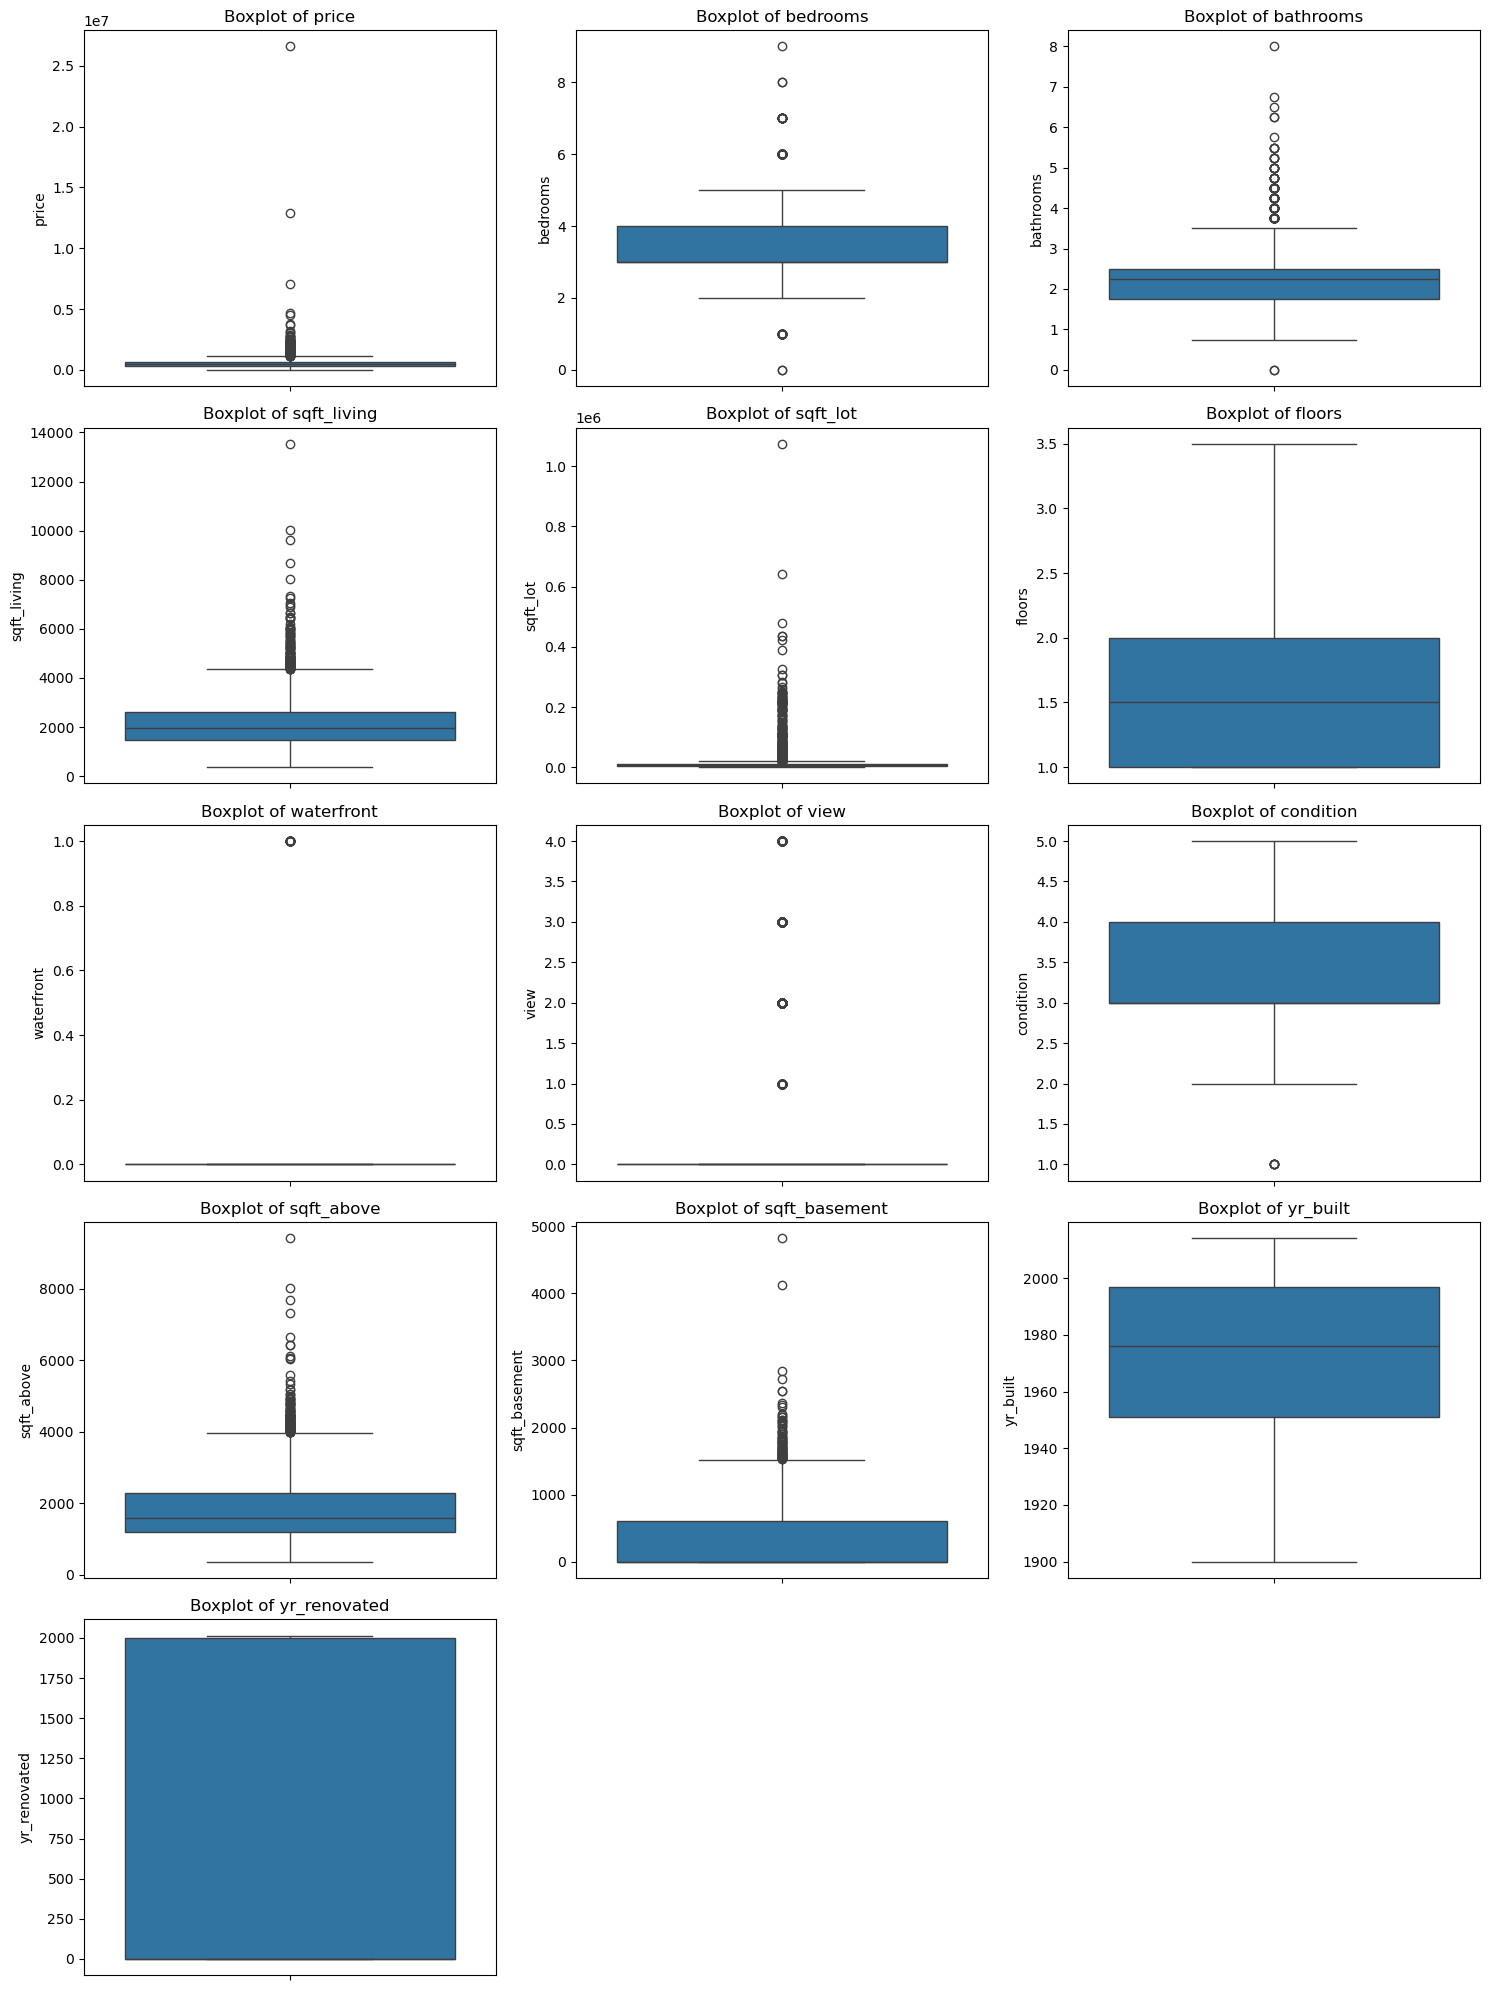

In [41]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Detect and Handle Outliers

In [42]:
## Detect Outliers

def detect_outliers_iqr(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[columns] < lower_bound) | (data[columns] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df, ['price'])
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 4600


In [43]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] <lower_bound, lower_bound, data[column] )
    data[column] = np.where(data[column] >upper_bound, upper_bound, data[column] )

cap_outliers(df, 'sqft_living')


In [44]:
# Handle All Outliers for all numerical columns

def cap_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = Q1 -1.5 * IQR
        upperbound = Q3 + 1.5 * IQR
        data[col] = np.where( data[col] < lowerbound, lowerbound, data[col] )
        data[col] = np.where( data[col] > upperbound, upperbound, data[col] )
    return data

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df = cap_outliers_iqr(df, numeric_cols)

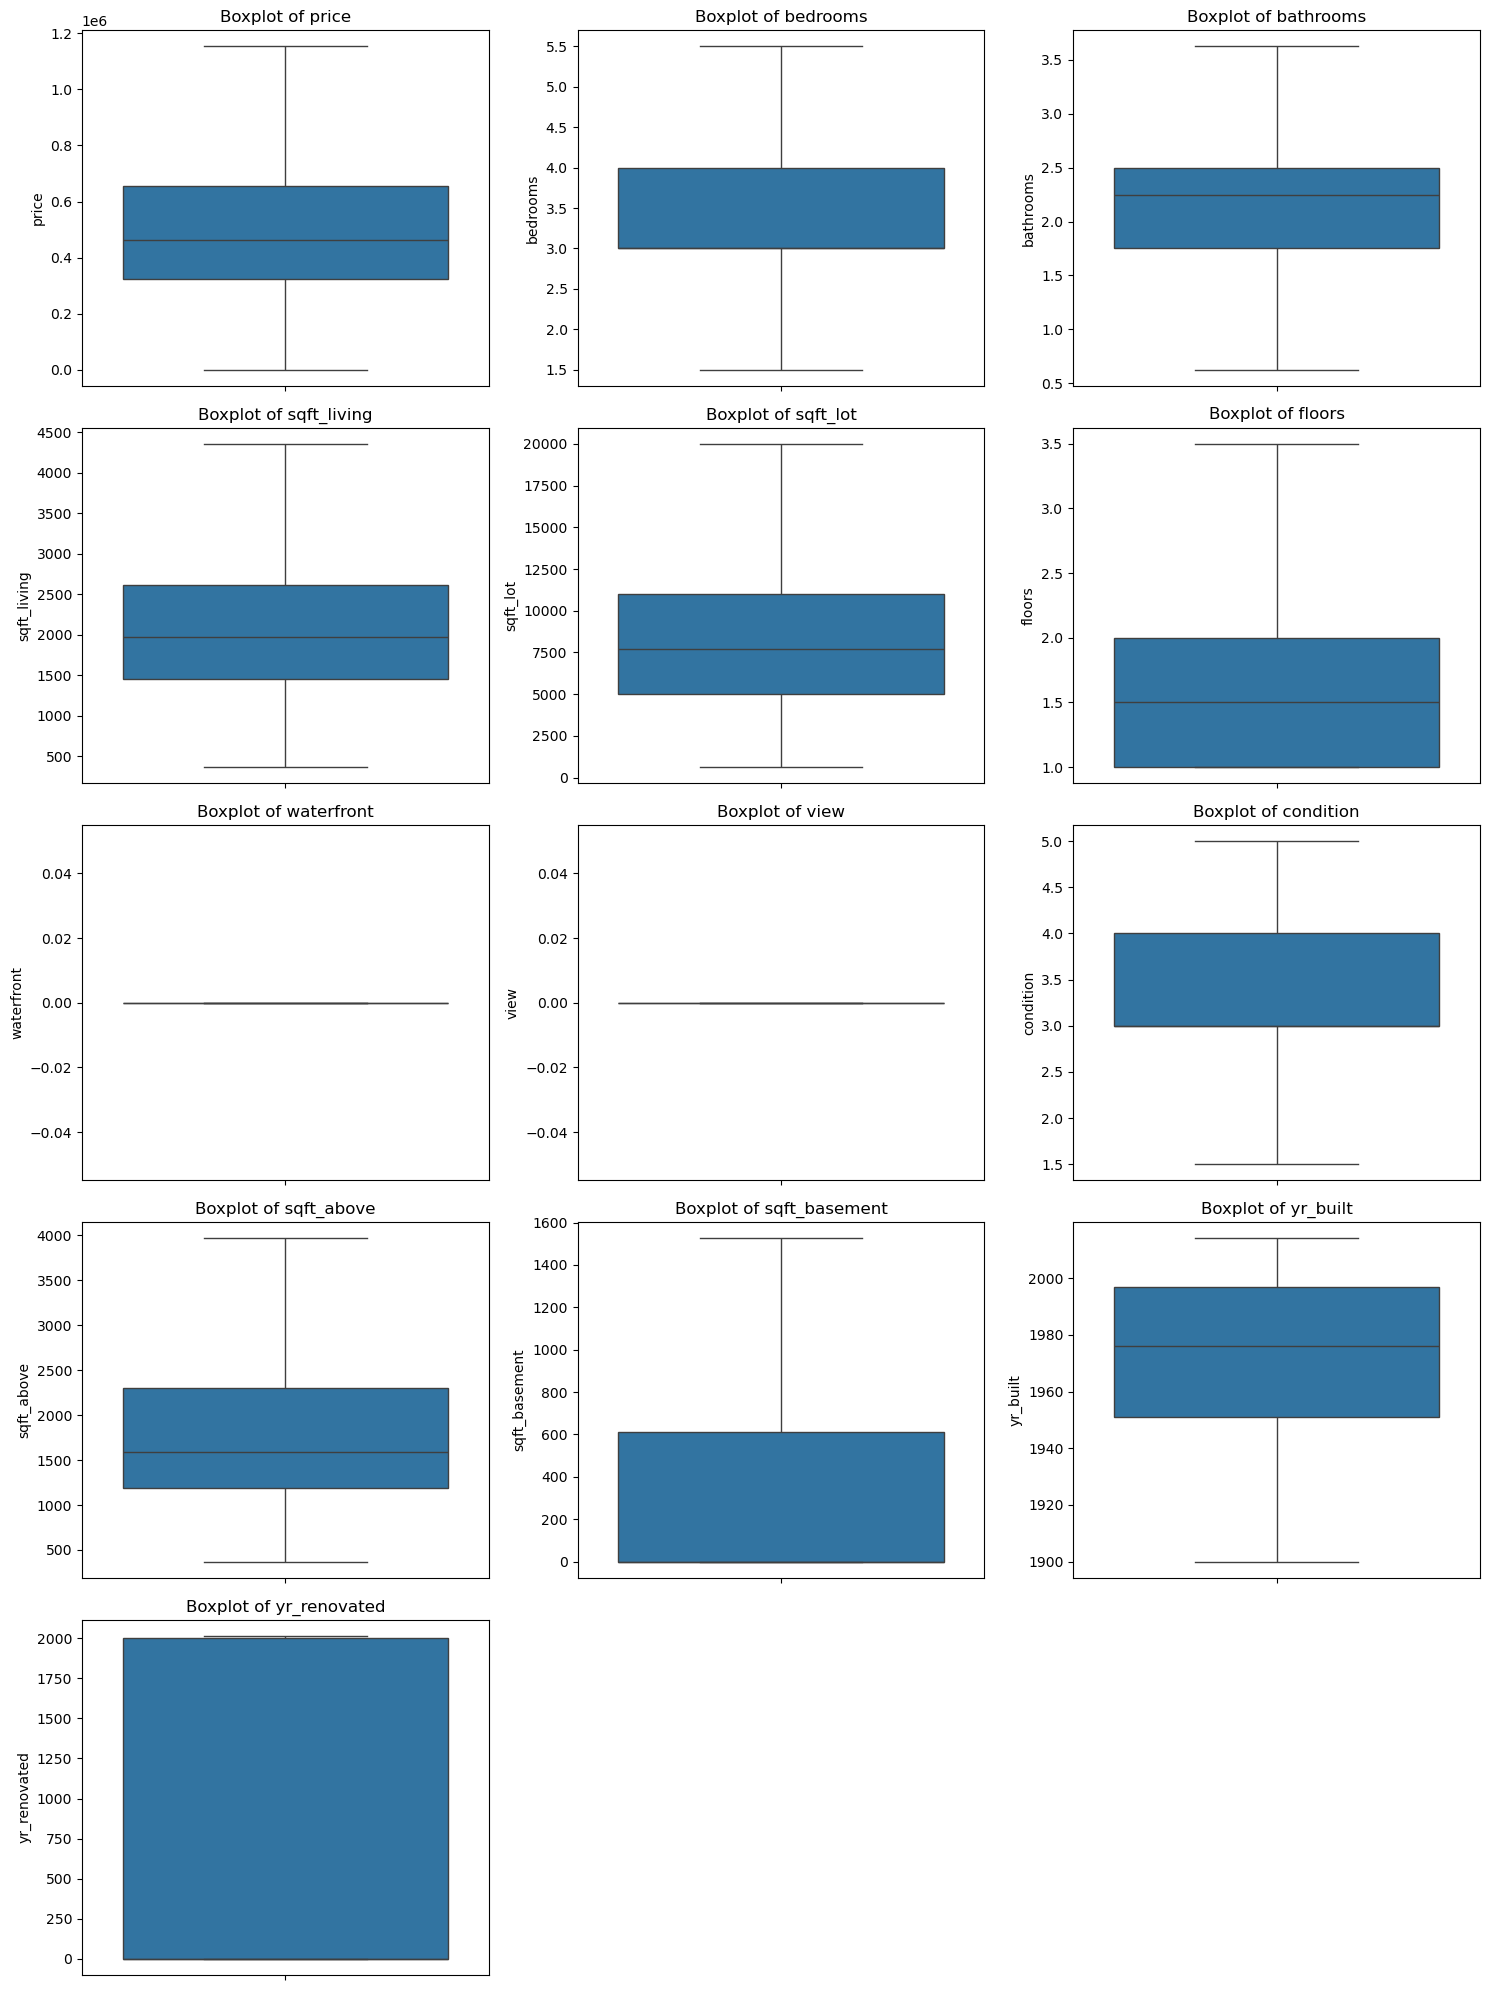

In [45]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Outlier Handling

Outliers were detected and capped using the **Interquartile Range (IQR) method** to prevent extreme values from skewing the model.

**Steps:**
1. Calculated Q1 (25th percentile) and Q3 (75th percentile) for each numeric column.
2. Computed the IQR = Q3 - Q1.
3. Defined lower and upper bounds as:
   - Lower Bound = Q1 - 1.5 × IQR  
   - Upper Bound = Q3 + 1.5 × IQR
4. Values below the lower bound were replaced with the lower bound.
5. Values above the upper bound were replaced with the upper bound.

**Note:**  
- Outlier handling was applied **only to numeric columns** (`price`, `sqft_living`, `sqft_lot`, `bedrooms`, `bathrooms`, etc.).
- Categorical variables were excluded, as they do not have outliers in the numerical sense.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1153093.75,5.0,2.50,3650.0,9050.0,2.0,0.0,0.0,5.0,3370.0,280.0,1921.0,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Processing

- Feature Engineering

In [47]:
print(df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [48]:
# Create House age
df['house_age'] = 2023 - df['yr_built']

# Create Year since renovation

df['years_since_renovation'] = np.where(df['yr_renovated'] == 0, 
                        df['house_age'],
                         2023 - df['yr_renovated'])

#Drop the original columns
df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)

# Create Total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

#Drop the original columns
df.drop(columns=['bedrooms', 'bathrooms'], inplace=True)


df.head()


,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,country,house_age,years_since_renovation,total_rooms
0,2014-05-02 00:00:00,313000.00,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,18810 Densmore Ave N,Shoreline,WA 98133,USA,68.0,18.0,4.50
1,2014-05-02 00:00:00,1153093.75,3650.0,9050.0,2.0,0.0,0.0,5.0,3370.0,280.0,709 W Blaine St,Seattle,WA 98119,USA,102.0,102.0,7.50
2,2014-05-02 00:00:00,342000.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,57.0,57.0,5.00
3,2014-05-02 00:00:00,420000.00,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,857 170th Pl NE,Bellevue,WA 98008,USA,60.0,60.0,5.25
4,2014-05-02 00:00:00,550000.00,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,9105 170th Ave NE,Redmond,WA 98052,USA,47.0,31.0,6.50


In [49]:
#Drop unwanted columns
df.drop(columns=[ 'date', 'street',  'country', ], inplace=True)
df.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,house_age,years_since_renovation,total_rooms
0,313000.00,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,Shoreline,WA 98133,68.0,18.0,4.50
1,1153093.75,3650.0,9050.0,2.0,0.0,0.0,5.0,3370.0,280.0,Seattle,WA 98119,102.0,102.0,7.50
2,342000.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,Kent,WA 98042,57.0,57.0,5.00
3,420000.00,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,Bellevue,WA 98008,60.0,60.0,5.25
4,550000.00,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,Redmond,WA 98052,47.0,31.0,6.50


- Separate tragets x and y

In [50]:
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Define numeric & categorical feature names
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ]
)

# Pipeline: Preprocessing + Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=400))
])

# Fit & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 25183744389.362076
R²: 0.6354927302127165


c:\Users\HP\anaconda3\envs\housing_pred_env\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [57]:
from xgboost import XGBRegressor

xgb = Pipeline(steps = [
    ('processor', preprocessor),
    ('regressor', XGBRegressor() )
])
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

num_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X_train.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # no drop='first' for trees
])

xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])
xgb.fit(X_train, y_train)



,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
xgb_pred = xgb.predict(X_test)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R²:", r2_score(y_test, xgb_pred))



MSE: 21490282796.670357
R²: 0.6889515638317927


In [62]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define numeric & categorical feature names
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # (optional for trees)
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ]
)

# Pipeline with log-transformed target
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42, n_estimators=400),
        func=np.log1p,          # y -> log1p(y)
        inverse_func=np.expm1   # back to dollars
    ))
])

# Fit & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  # already inverse-transformed to original scale

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²  : {r2:.3f}")


MSE : 47,631,977,540
RMSE: 218,248
R²  : 0.311


c:\Users\HP\anaconda3\envs\housing_pred_env\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
